Time Series Data Analysis Project
#myvenv\Scripts\activate

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# read the data
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
#data already sorted by dates

# change the names of columns
df.columns = ["Date", "Number of Passengers"]
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Date', ylabel='Number of Passengers'>

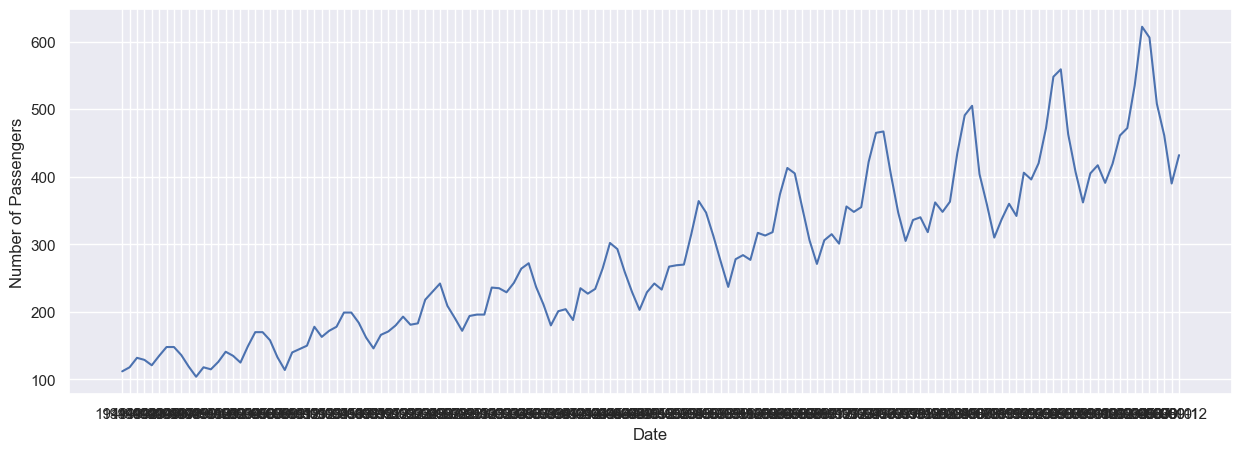

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x="Date", y="Number of Passengers", data=df)

Text(0.5, 1.0, 'Number of Passengers Over Time')

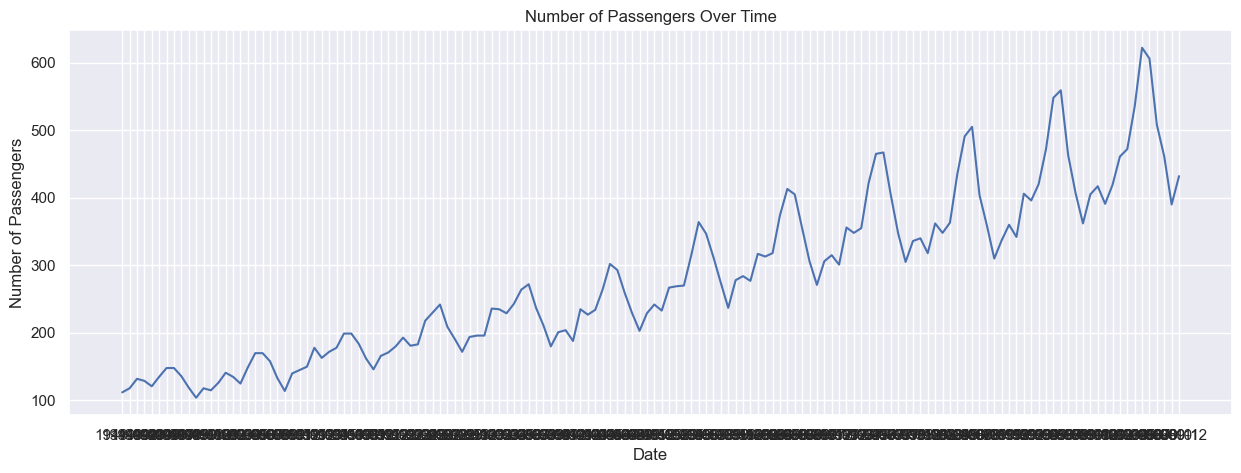

In [7]:
# plot the data using sns
sns.set(rc={'figure.figsize':(15, 5)}) # set the figure size
sns.lineplot(x = "Date", y = "Number of Passengers",  data = df)
# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, '1949-01'),
  Text(1, 0, '1949-02'),
  Text(2, 0, '1949-03'),
  Text(3, 0, '1949-04'),
 

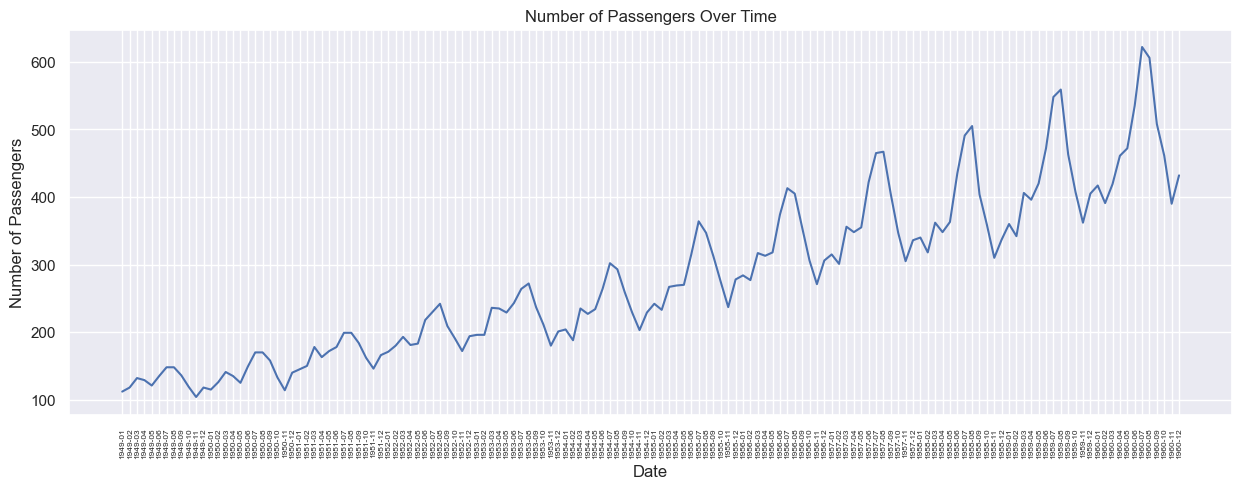

In [8]:
# plot the data using sns
sns.set(rc={'figure.figsize':(15, 5)}) # set the figure size
sns.lineplot(x = "Date", y = "Number of Passengers",  data = df)
# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")
#rotate x-axis ticks
plt.xticks(rotation=90, fontsize=6)

In [9]:
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
#plotly prefered to use -- you can zoom in and see month wise and even dayWise
# make same plot using plotly
import plotly.express as px
fig = px.line(df, x="Date", y="Number of Passengers", title='Number of Passengers Over Time')

# change color of line
#fig.update_traces(line_color='red')
#fig.update_xaxes(range=['1949-01-01','1949-12-01']) #if dont want to use manual zoom
fig.show()

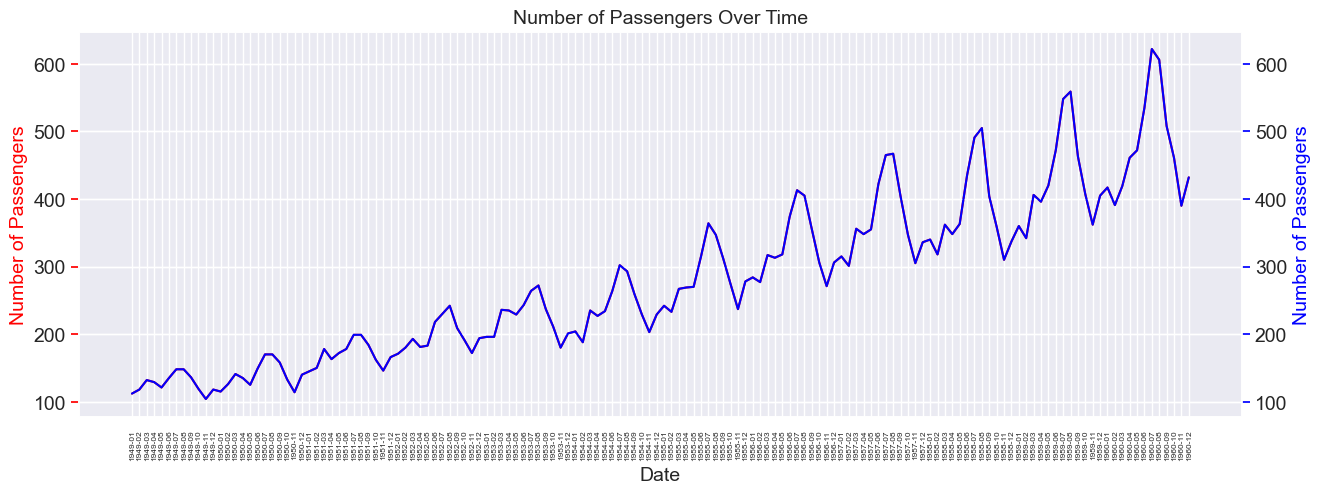

In [16]:
# make two sided plot using matplotlib #if you have more than 1 variables against data/time
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Date"], df["Number of Passengers"], color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Passengers",color="red",fontsize=14)
ax.set_title("Number of Passengers Over Time",fontsize=14)
ax.tick_params(axis="y",color="red",labelsize=14)
ax.tick_params(axis="x",labelsize=6, rotation=90)
ax2=ax.twinx()
ax2.plot(df["Date"], df["Number of Passengers"],color="blue")
ax2.set_ylabel("Number of Passengers",color="blue",fontsize=14)
ax2.tick_params(axis="y",color="blue",labelsize=14)
plt.show()

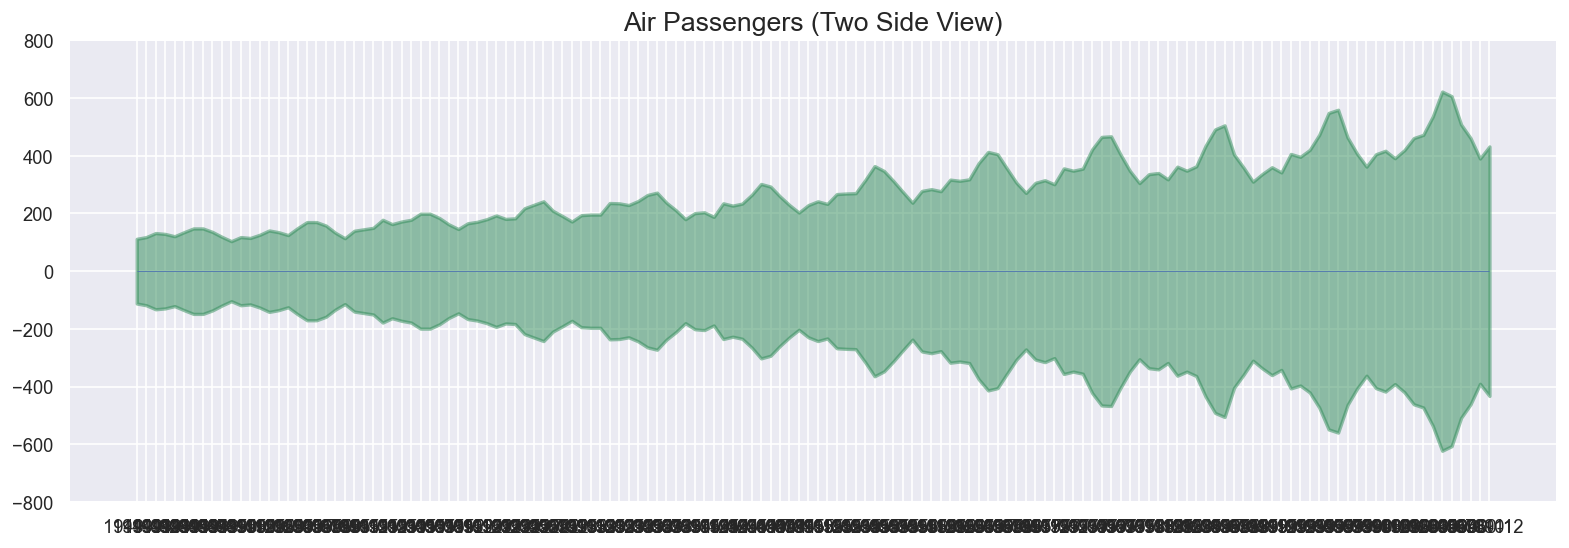

In [17]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

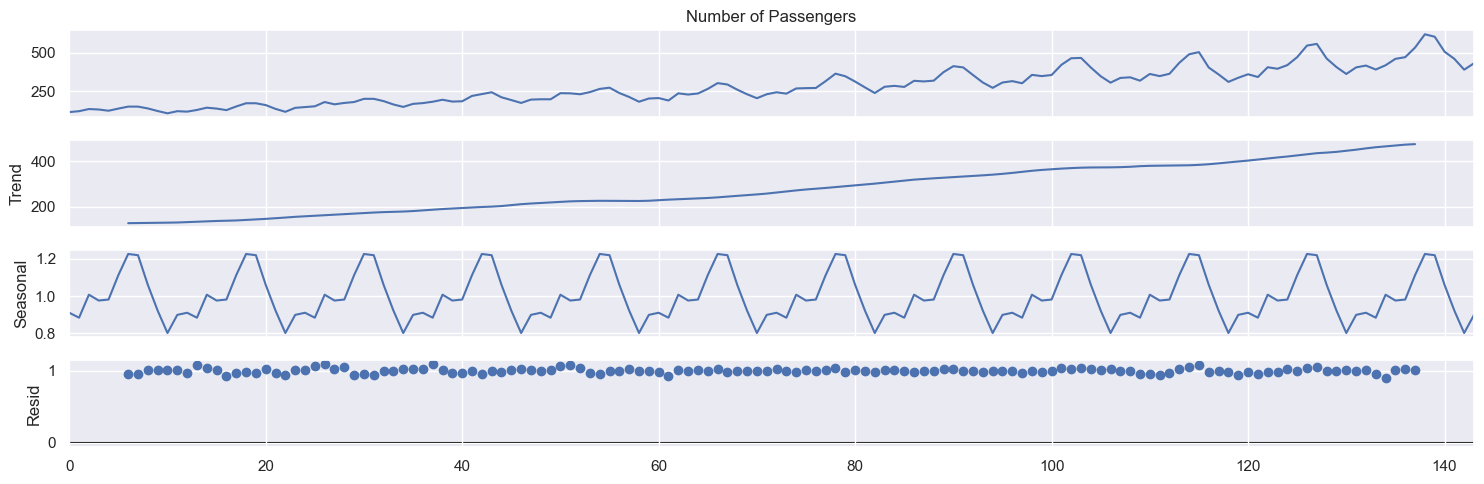

In [18]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()
# plot in plotly
fig = px.line(result.observed, x=result.observed.index, y=result.observed.values, title='Observed')
fig.show()

#zoom and understand the patterns -- june july we have large number of 
#passengers traveling
#in 12 year how much rate is the rate of change of #pass
#what percent of year15 pass = 148 pass of year1? 4.5% increased

<Axes: >

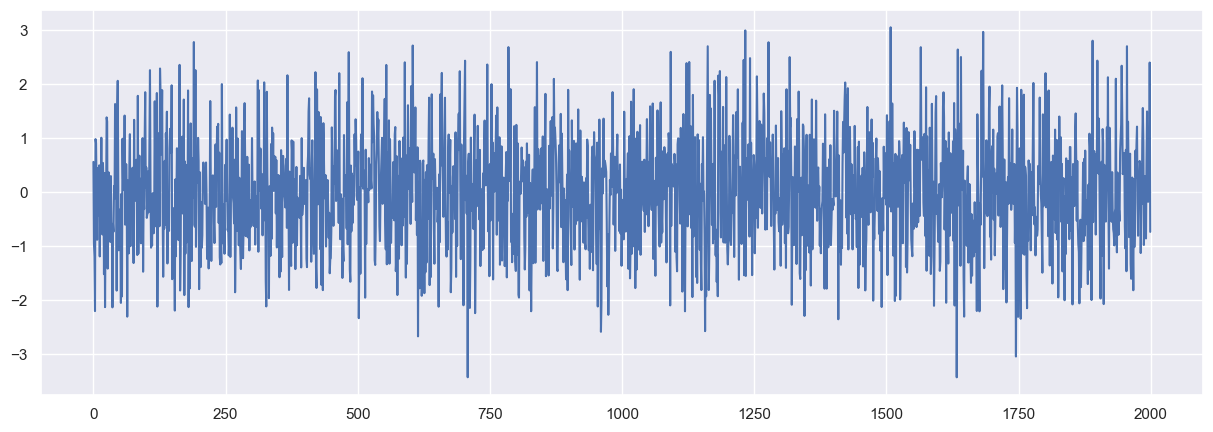

In [19]:
rand_numbs = np.random.randn(2000)
rand_numbs
pd.Series(rand_numbs).plot()